# Регрессия IC50

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
target = 'SI'

In [69]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [70]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272


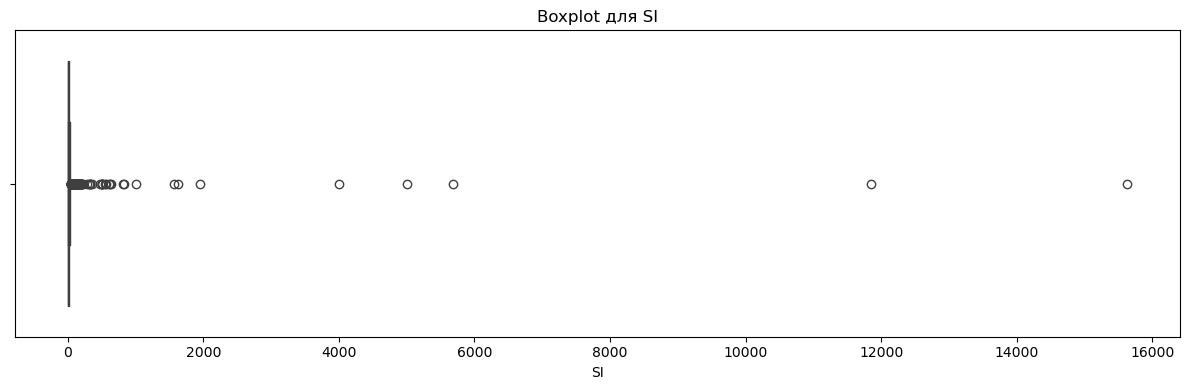

In [71]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [72]:
df["log_10_SI"] = np.log10(df[target])

In [73]:
target_old = target
target = "log_10_SI"

In [74]:
target = target_old
target_old = "log_10_SI"

In [75]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI
107,0.355556,-0.808845,0.580042,-0.047797,0.656361,-0.741293,0.972481,-0.660642,0.563687,-0.457965,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.393088,1965.439708,5000.000000,3.698970
768,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.003517,19.999437,5687.000000,3.754883
770,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.021100,250.001758,11848.333333,4.073657
793,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.032009,128.090060,4001.700000,3.602245
796,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.016004,249.999200,15620.600000,4.193698


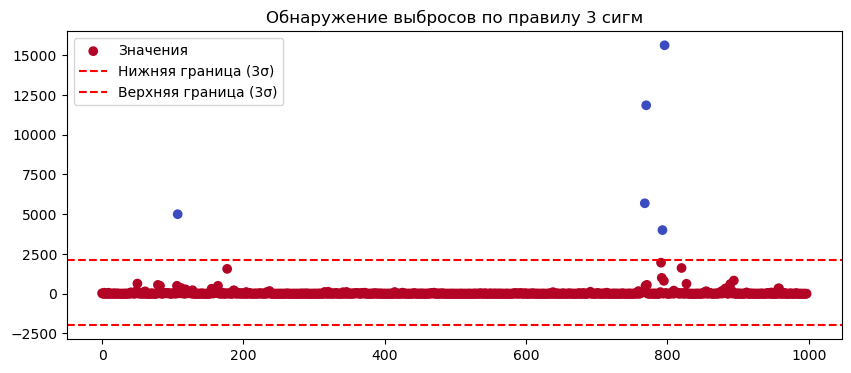

In [76]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [77]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI,is_outlier_3σ,is_outlier_IQR
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1.800960,False,True
9,-1.417714,0.345653,0.758468,-0.666417,0.539312,0.946275,-0.840004,-0.657698,-2.253237,-0.462484,...,-0.234453,-0.274647,-0.168855,-0.084045,6.400847,400.906360,62.633333,1.796806,False,True
41,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,15.078486,1344.065056,89.137931,1.950063,False,True
44,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,22.825266,1254.135512,54.945055,1.739929,False,True
47,-1.727458,1.290243,0.858769,-1.607705,0.623477,0.947291,-1.522105,1.500099,-2.546610,-0.576794,...,-0.234453,-0.274647,7.229473,-0.084045,45.006900,2216.216562,49.241706,1.692333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.659083,0.730976,-0.432297,0.560932,-0.624908,-0.426982,0.861013,-0.437833,-0.779704,-0.445203,...,-0.234453,-0.274647,-0.168855,-0.084045,6.299480,500.000000,79.371629,1.899665,False,True
957,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,2.524424,False,True
958,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,2.524424,False,True
966,1.170154,-0.602861,-0.278145,-1.496614,-1.134865,2.459102,1.330155,-0.809777,-1.110305,-0.279200,...,-0.234453,-0.274647,-0.168855,-0.084045,1.900747,99.999546,52.610669,1.721074,False,True


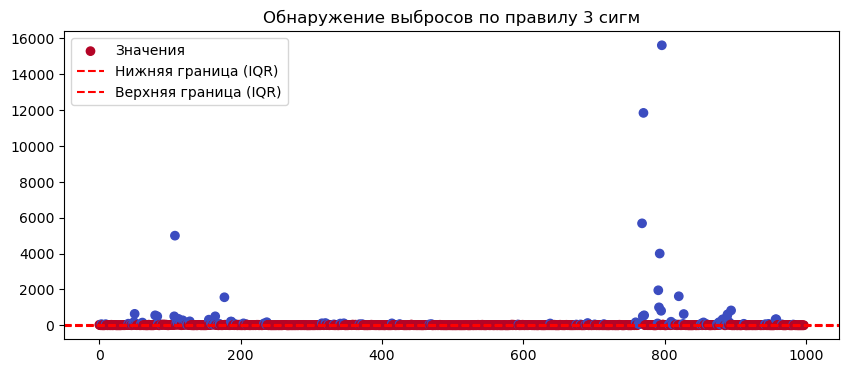

In [78]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Отбросим выбросов по 3-м сигмам значительно меньше, чем по правилу Тьюки. 

Данные распределены близко к нормальному распределнию, следовательно отбросим выбросы по 3 sigma

In [79]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,log_10_SI,is_outlier_3σ,is_outlier_IQR
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,1.449093,False,False
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,0.845098,False,False
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,-0.142668,False,False
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1.800960,False,True
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,0.113943,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0.052701,False,False
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0.026322,False,False
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0.040112,False,False
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0.013373,False,False


In [80]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272


In [81]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [82]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,6.406778,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.181542,3.676931,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045


In [83]:
y_ic50

0      28.125000
1       7.000000
2       0.720000
3      63.235294
4       1.300000
         ...    
993     1.129017
994     1.062484
995     1.096761
996     1.031272
997     1.000000
Name: SI, Length: 993, dtype: float64

In [84]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

## Инициализация моделей и метрик

In [85]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [86]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [87]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=RANDOM_STATE),
    'XGBoost': XGBRegressor(random_state=RANDOM_STATE),
    'SVR': SVR()
}

metrics = {
    'R2': r2_score,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'MAPE': mean_absolute_percentage_error
}

## Бейзлайн

Проверим линейные модели, деревья, а также SVR

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50, 
                               cv=5, scoring='r2', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    y_pred = model.predict(X_test)
    
    model_metrics = {metric_name: metric_func(y_test_ic50, y_pred) 
                     for metric_name, metric_func in metrics.items()}
    
    results.append({
        'model': name,
        'cv_mean_r2': np.mean(cv_scores),
        'cv_std_r2': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

          model  cv_mean_r2  cv_std_r2        R2        RMSE        MAE  \
0         Ridge   -0.525791   0.970864  0.156357   99.337248  52.812892   
1         Lasso   -0.034328   0.156725  0.216381   95.738166  43.998541   
2  RandomForest   -0.196954   0.383623  0.265573   92.684466  32.088594   
3       XGBoost   -0.270612   0.285288  0.415824   82.661704  28.171214   
4           SVR   -0.041955   0.014948 -0.045067  110.561713  27.700237   

        MAPE  
0  22.215494  
1  17.335410  
2  13.204751  
3  11.328810  
4   1.466649  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [90]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [91]:
N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

N_TRIALS_SVR = 30
CV_FOLDS_SVR = 5

### Random Forest

In [92]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestRegressor(
        **params,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_RF, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)

In [93]:
study_rf = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF)

[I 2025-06-02 15:42:19,238] A new study created in memory with name: no-name-c340b1ab-708c-46dd-ba57-bd3ae7ff8eab
[I 2025-06-02 15:42:21,536] Trial 0 finished with value: 0.059362485702782485 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.059362485702782485.
[I 2025-06-02 15:42:23,293] Trial 1 finished with value: 0.03907335391258556 and parameters: {'n_estimators': 641, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.059362485702782485.
[I 2025-06-02 15:42:24,605] Trial 2 finished with value: 0.0505994450722028 and parameters: {'n_estimators': 374, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.059362485702782485.
[I 2025-06-02 15:42:25,805] Trial 3 finished with value: 0.05

In [94]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший R2: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 408, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}
Лучший R2: 0.0705


In [95]:
best_rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_rf_model.fit(X_train, y_train_ic50)

RandomForestRegressor(bootstrap=False, max_depth=19, max_features='log2',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=408,
                      n_jobs=-1, random_state=42)

#### Оценка модели на лучшем наборе данных

In [96]:
y_pred_best_rf = best_rf_model.predict(X_test)

final_metrics_rf = {metric_name: metric_func(y_test_ic50, y_pred_best_rf) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.4255
RMSE: 81.9734
MAE: 28.3864
MAPE: 12.0828


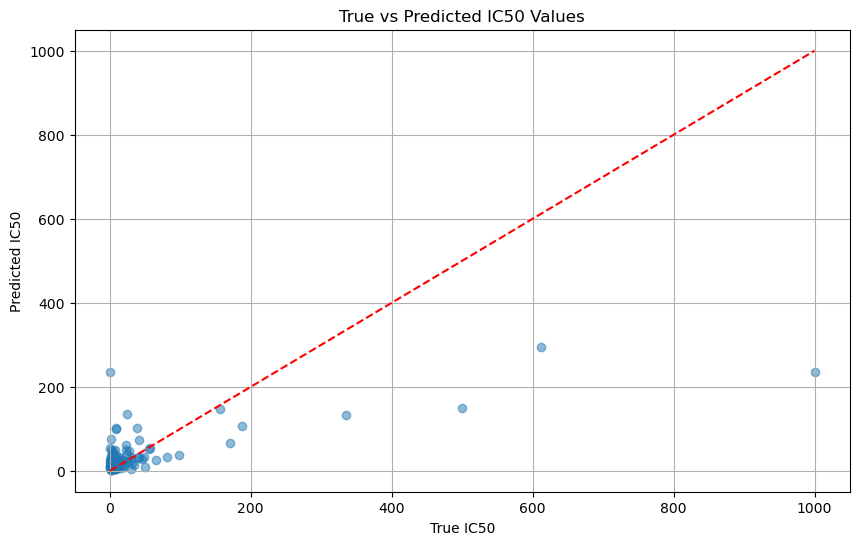

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_rf, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

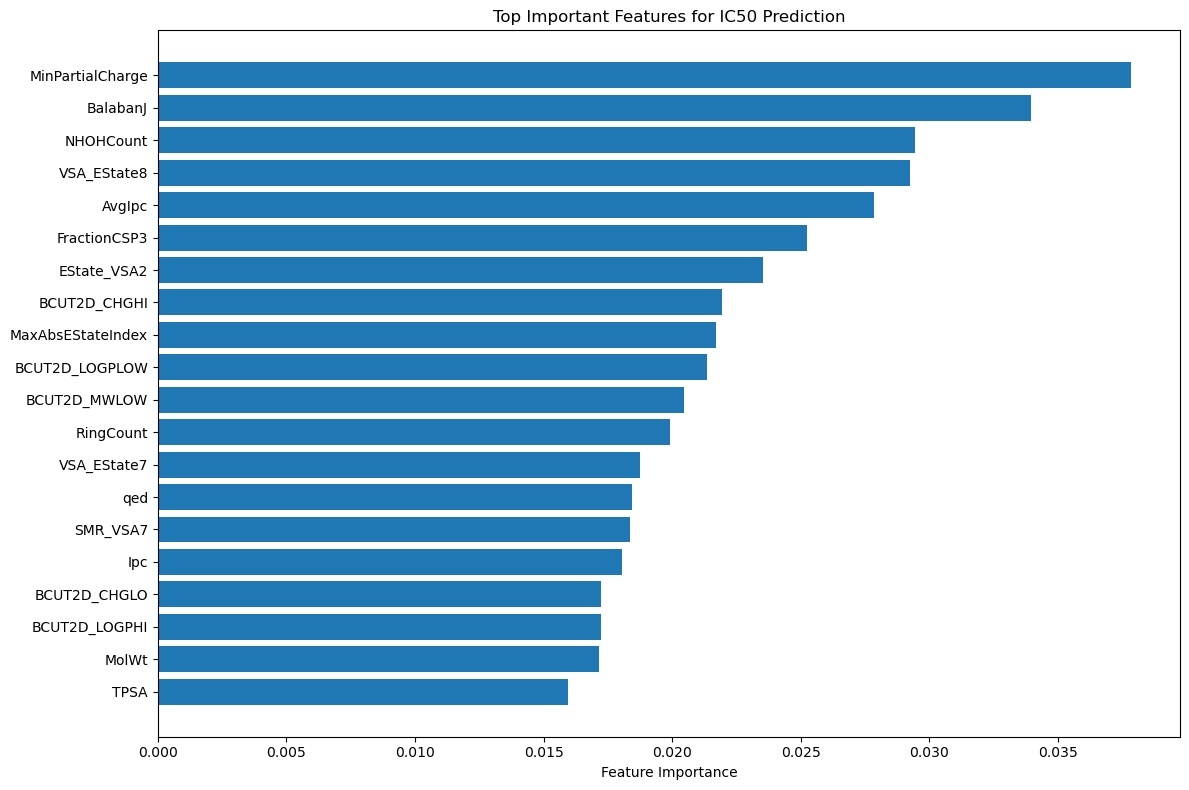

In [ ]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.show()

### XGBoost

In [99]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }
    
    model = XGBRegressor(
        **params,
        random_state=RANDOM_STATE,
        tree_method='exact',
        enable_categorical=False
    )
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_XGB, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [100]:
study_xgb = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_XGB)

[I 2025-06-02 15:44:59,141] A new study created in memory with name: no-name-43a78fff-a3c4-4f6c-b820-dec585fbce44
[I 2025-06-02 15:45:03,381] Trial 0 finished with value: -0.08372649130241142 and parameters: {'n_estimators': 437, 'max_depth': 12, 'learning_rate': 0.06504856968981275, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.7799726016810132, 'reg_alpha': 0.5808361216819946, 'reg_lambda': 8.661761457749352}. Best is trial 0 with value: -0.08372649130241142.
[I 2025-06-02 15:45:10,324] Trial 1 finished with value: 0.10699761691315919 and parameters: {'n_estimators': 641, 'max_depth': 10, 'learning_rate': 0.001124579825911934, 'subsample': 0.9849549260809971, 'colsample_bytree': 0.9162213204002109, 'gamma': 1.0616955533913808, 'reg_alpha': 1.8182496720710062, 'reg_lambda': 1.8340450985343382}. Best is trial 1 with value: 0.10699761691315919.
[I 2025-06-02 15:45:13,651] Trial 2 finished with value: -0.003925782406376643 and parameters: {'n_estimat

In [101]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший R2: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 291, 'max_depth': 10, 'learning_rate': 0.003931729804077532, 'subsample': 0.7593677304426545, 'colsample_bytree': 0.5439763574618138, 'gamma': 3.2867758121918293, 'reg_alpha': 9.393283579098593, 'reg_lambda': 4.549767605821109}
Лучший R2: 0.1267


In [102]:
best_xgb_model = XGBRegressor(
    **study_xgb.best_params,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
best_xgb_model.fit(X_train, y_train_ic50)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5439763574618138, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=3.2867758121918293, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.003931729804077532,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=291, n_jobs=-1,
             num_parallel_tree=None, ...)

#### Оценка модели на лучшем наборе данных

In [103]:
y_pred_best_xgb = best_xgb_model.predict(X_test)

final_metrics_xgb = {metric_name: metric_func(y_test_ic50, y_pred_best_xgb) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_xgb.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.2677
RMSE: 92.5501
MAE: 31.1444
MAPE: 10.5611


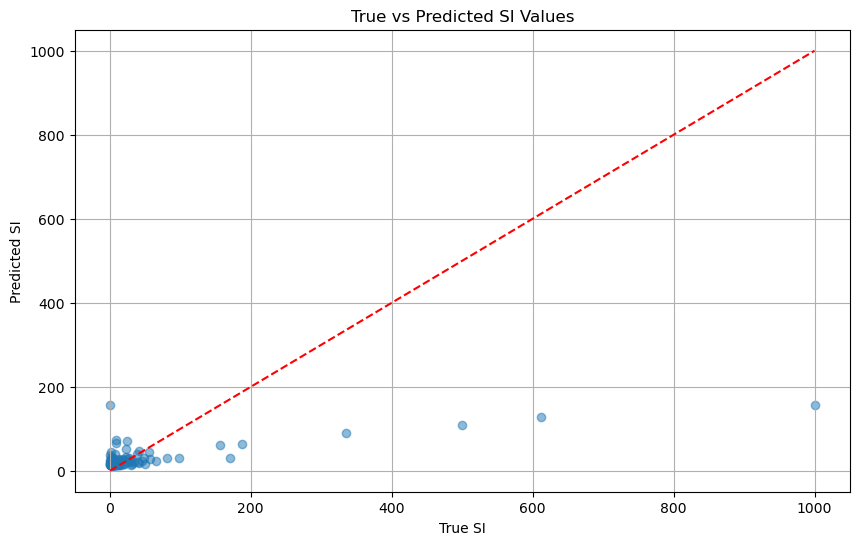

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_xgb, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

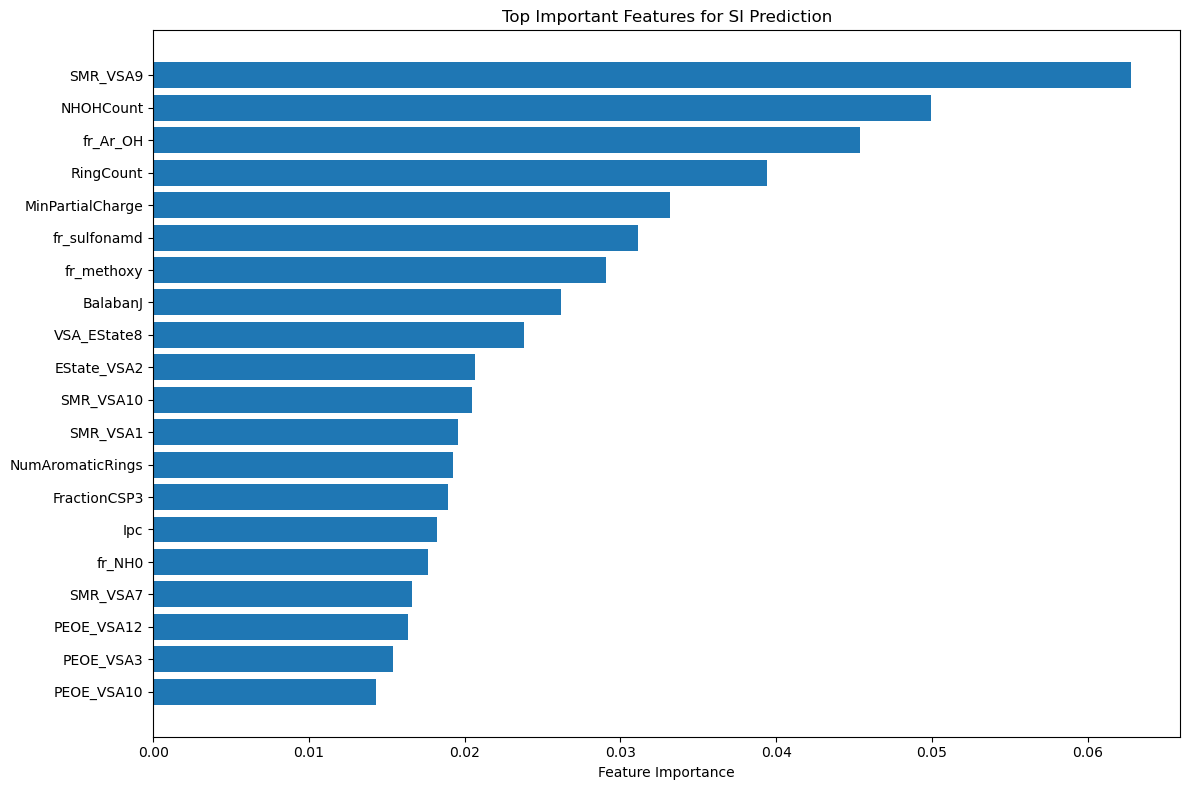

In [105]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.savefig('ic50_feature_importance.png')
    plt.show()

### SVR

In [106]:
def optimize_svr(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 100, log=True),
        'epsilon': trial.suggest_float('epsilon', 0.001, 1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'gamma': trial.suggest_float('gamma', 0.001, 10, log=True)
    }
    
    if params['kernel'] == 'poly':
        params['degree'] = trial.suggest_int('degree', 2, 5)
    
    model = SVR(**params)
    
    r2_scores = cross_val_score(
        model, X_train, y_train_ic50, 
        cv=CV_FOLDS_SVR, scoring='r2', n_jobs=-1
    )
    
    return np.mean(r2_scores)


In [107]:
study_svr = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=RANDOM_STATE)
)
study_svr.optimize(optimize_svr, n_trials=N_TRIALS_SVR)

[I 2025-06-02 15:49:40,701] A new study created in memory with name: no-name-3e4f79e5-e1cb-4ceb-8785-fab2c1e42bbf
[I 2025-06-02 15:49:40,881] Trial 0 finished with value: -0.0004560461018307649 and parameters: {'C': 1.3292918943162164, 'epsilon': 0.7114476009343417, 'kernel': 'linear', 'gamma': 0.004207988669606638}. Best is trial 0 with value: -0.0004560461018307649.
[I 2025-06-02 15:49:40,991] Trial 1 finished with value: 0.0013164040837540859 and parameters: {'C': 0.2937538457632829, 'epsilon': 0.001493656855461764, 'kernel': 'linear', 'gamma': 0.6796578090758157}. Best is trial 1 with value: 0.0013164040837540859.
[I 2025-06-02 15:49:41,077] Trial 2 finished with value: -0.0070359270545100605 and parameters: {'C': 0.115279871282324, 'epsilon': 0.8123245085588684, 'kernel': 'linear', 'gamma': 0.005337032762603957}. Best is trial 1 with value: 0.0013164040837540859.
[I 2025-06-02 15:49:41,174] Trial 3 finished with value: 0.0023454724967442385 and parameters: {'C': 0.3549878832196502

In [108]:
print(f"Лучшие параметры для SVR:")
print(study_svr.best_params)
print(f"Лучший R2: {study_svr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_svr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_svr)
fig.show()

Лучшие параметры для SVR:
{'C': 79.58994628965861, 'epsilon': 0.07563923559558342, 'kernel': 'rbf', 'gamma': 0.08278674490518691}
Лучший R2: 0.1040


In [109]:
best_svr_model = SVR(
    **study_svr.best_params
)
best_svr_model.fit(X_train, y_train_ic50)

SVR(C=79.58994628965861, epsilon=0.07563923559558342, gamma=0.08278674490518691)

#### Оценка модели на лучшем наборе данных

In [110]:
y_pred_best_svr = best_svr_model.predict(X_test)

final_metrics_svr = {metric_name: metric_func(y_test_ic50, y_pred_best_svr) 
                 for metric_name, metric_func in metrics.items()}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_svr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
R2: 0.0948
RMSE: 102.8978
MAE: 27.2800
MAPE: 3.6754


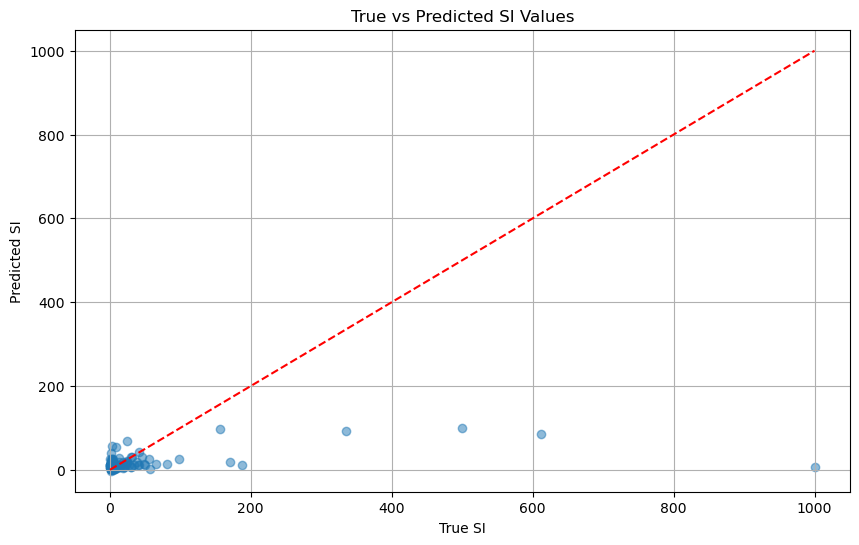

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ic50, y_pred_best_svr, alpha=0.5)
plt.plot([min(y_test_ic50), max(y_test_ic50)], 
         [min(y_test_ic50), max(y_test_ic50)], 'r--')
plt.xlabel('True SI')
plt.ylabel('Predicted SI')
plt.title('True vs Predicted SI Values')
plt.grid(True)
plt.show()

#### Анализ важности признаков

In [112]:
if hasattr(best_svr_model, 'feature_importances_'):
    importances = best_svr_model.feature_importances_
    feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
    
    sorted_idx = importances.argsort()[::-1]
    top_features = 20
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features for SI Prediction')
    plt.tight_layout()
    plt.show()

## Сравнение моделей

In [113]:
metrics_comparisson = {
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
    "SVR": final_metrics_svr
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [114]:
df_metrics

,RF,XGB,SVR
R2,0.425513,0.267701,0.094795
RMSE,81.973375,92.550118,102.897833
MAE,28.386445,31.144393,27.279992
MAPE,12.082823,10.561119,3.675364


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

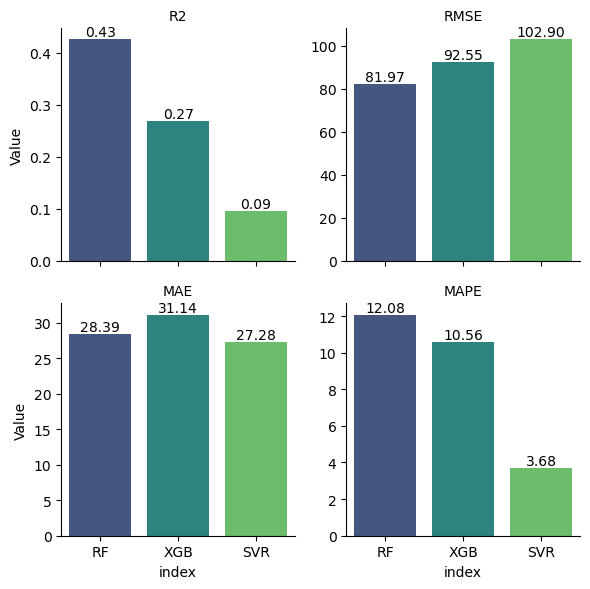

In [115]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Очевидно, Random Forest является лучшей моделью